In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV

In [8]:
# Load the California Housing dataset (a modern alternative to Boston Housing)
# This dataset contains housing prices in California along with various features
california = fetch_california_housing()
X = california.data
y = california.target
feature_names = california.feature_names

# Create a DataFrame for better understanding of the data
california_df = pd.DataFrame(X, columns=feature_names)
california_df['MedHouseVal'] = y

# Display basic information about the dataset
print("California Housing Dataset Information:")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Feature names: {feature_names}")
print(f"Target variable: Median house value for California districts (in $100,000)")
print("\nFirst 5 rows of the dataset:")
print(california_df.head())

# Display dataset statistics
print("\nDataset Statistics:")
print(california_df.describe())

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

California Housing Dataset Information:
Number of samples: 20640
Number of features: 8
Feature names: ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
Target variable: Median house value for California districts (in $100,000)

First 5 rows of the dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

Dataset Statistics:
             MedInc      HouseAge      AveRooms 

In [9]:
# Define a comprehensive list of regression models to compare
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0, random_state=42),
    'Lasso Regression': Lasso(alpha=0.1, random_state=42, max_iter=10000),
    'ElasticNet Regression': ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42, max_iter=10000),
    'Decision Tree Regressor': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42, n_jobs=-1),
    'Gradient Boosting Regressor': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42),
    'AdaBoost Regressor': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'XGBoost Regressor': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, verbosity=0),
    'K-Neighbors Regressor': KNeighborsRegressor(n_neighbors=5, n_jobs=-1)
}

In [10]:
# Dictionary to store evaluation metrics for each model
results = {}

# Train each model and evaluate on test set
for name, model in models.items():
    print(f"Training {name}...")
    
    # Fit the model on training data
    model.fit(X_train, y_train)
    
    # Make predictions on test data
    y_pred = model.predict(X_test)
    
    # Calculate multiple evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results[name] = {
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R² Score': round(r2, 4)
    }

# Convert results to a DataFrame for easy comparison
results_df = pd.DataFrame(results).T

# Display the results table with comprehensive metrics
print("\n" + "="*80)
print("REGRESSION MODELS PERFORMANCE COMPARISON")
print("="*80)
print(results_df)

# Sort models by R² Score (higher is better) for better comparison
results_df_sorted = results_df.sort_values('R² Score', ascending=False)
print("\n" + "="*80)
print("MODELS RANKED BY R² SCORE (HIGHER IS BETTER)")
print("="*80)
print(results_df_sorted[['R² Score', 'RMSE', 'MAE']])

Training Linear Regression...
Training Ridge Regression...
Training Lasso Regression...
Training ElasticNet Regression...
Training Decision Tree Regressor...
Training Random Forest Regressor...
Training Gradient Boosting Regressor...
Training AdaBoost Regressor...
Training XGBoost Regressor...
Training K-Neighbors Regressor...

REGRESSION MODELS PERFORMANCE COMPARISON
                                MAE     MSE    RMSE  R² Score
Linear Regression            0.5332  0.5559  0.7456    0.5758
Ridge Regression             0.5332  0.5558  0.7455    0.5759
Lasso Regression             0.5816  0.6135  0.7833    0.5318
ElasticNet Regression        0.5565  0.5731  0.7570    0.5627
Decision Tree Regressor      0.5223  0.5245  0.7242    0.5997
Random Forest Regressor      0.4905  0.4628  0.6803    0.6468
Gradient Boosting Regressor  0.3716  0.2940  0.5422    0.7756
AdaBoost Regressor           0.6068  0.5682  0.7538    0.5664
XGBoost Regressor            0.3710  0.2952  0.5433    0.7747
K-Neighbo

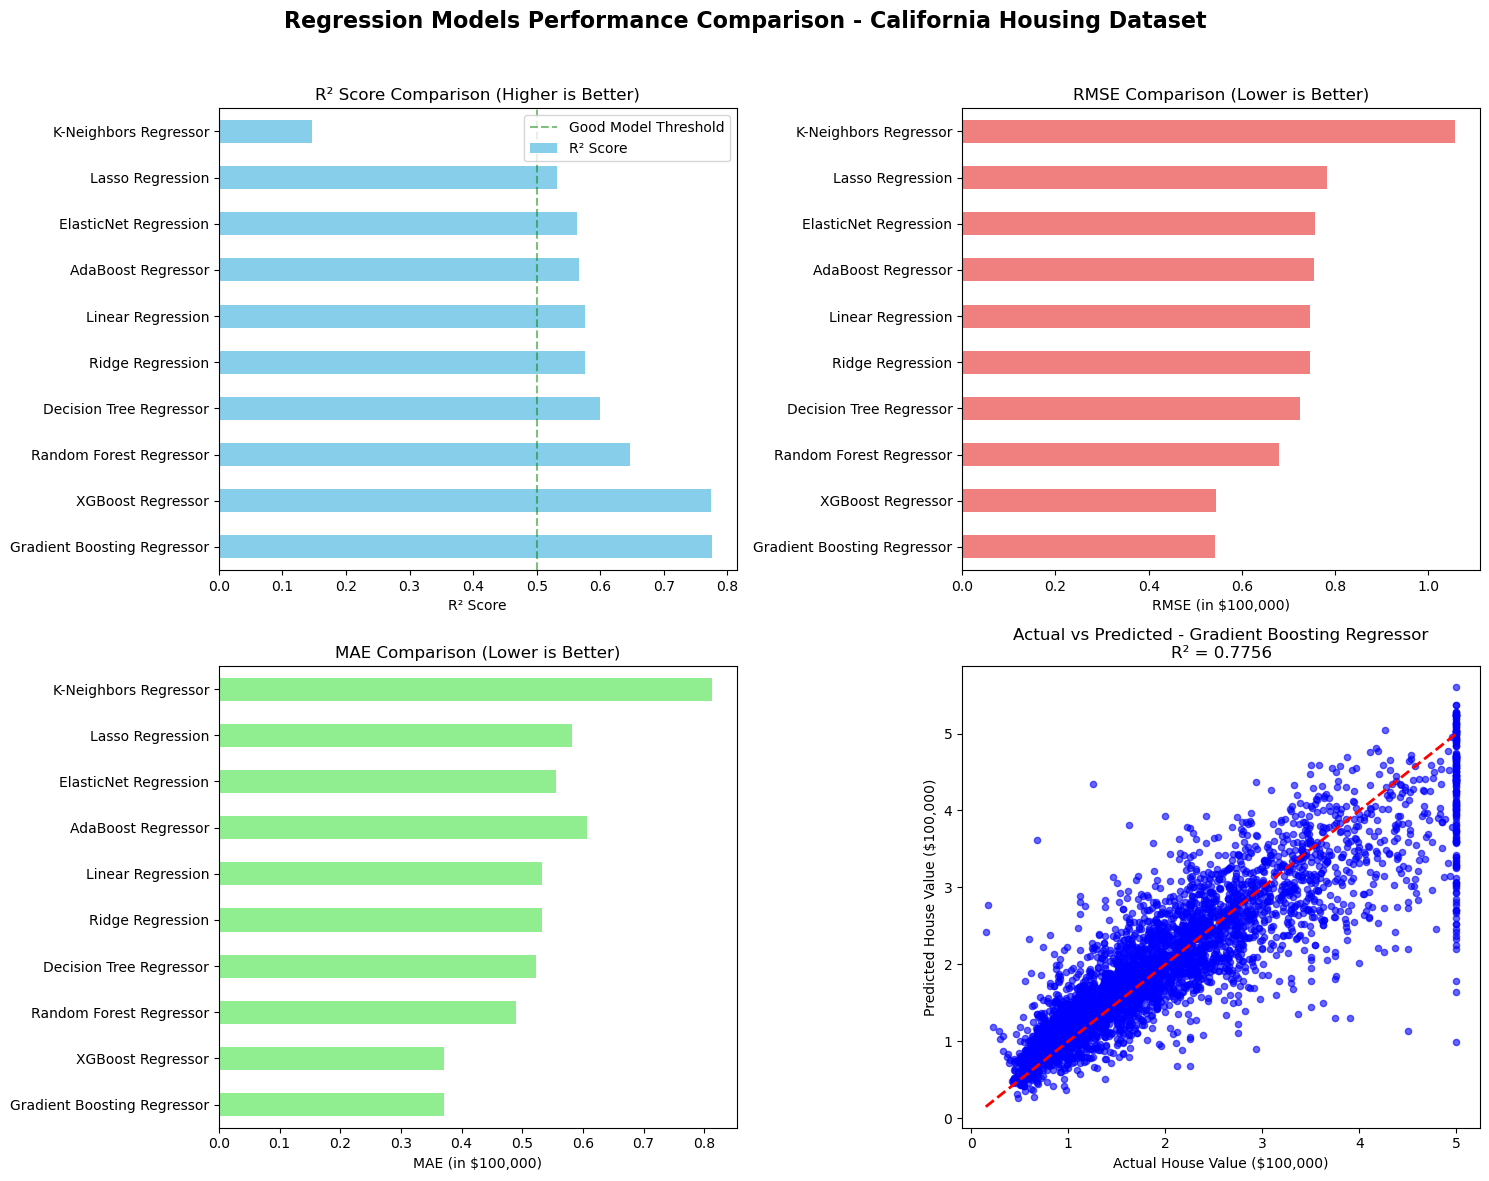


FEATURE IMPORTANCE FOR TREE-BASED MODELS

Decision Tree Regressor - Top 5 Important Features:
    Feature  Importance
0    MedInc    0.771212
5  AveOccup    0.128407
1  HouseAge    0.041621
2  AveRooms    0.031261
6  Latitude    0.022049
Total importance: 1.0000

Random Forest Regressor - Top 5 Important Features:
    Feature  Importance
0    MedInc    0.753375
5  AveOccup    0.141805
1  HouseAge    0.040750
6  Latitude    0.024952
2  AveRooms    0.019465
Total importance: 1.0000

Gradient Boosting Regressor - Top 5 Important Features:
     Feature  Importance
0     MedInc    0.604259
5   AveOccup    0.122835
7  Longitude    0.109853
6   Latitude    0.098533
1   HouseAge    0.034113
Total importance: 1.0000

XGBoost Regressor - Top 5 Important Features:
     Feature  Importance
0     MedInc    0.565163
5   AveOccup    0.142881
7  Longitude    0.074973
6   Latitude    0.066038
1   HouseAge    0.065310
Total importance: 1.0000

TRAINING VS TESTING PERFORMANCE (R² SCORE)
                

In [11]:
# Visualize the results using multiple plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Regression Models Performance Comparison - California Housing Dataset', 
             fontsize=16, fontweight='bold')

# Plot 1: R² Score comparison
results_df_sorted['R² Score'].plot(kind='barh', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('R² Score Comparison (Higher is Better)', fontsize=12)
axes[0, 0].set_xlabel('R² Score')
axes[0, 0].axvline(x=0, color='red', linestyle='--', alpha=0.5)
axes[0, 0].axvline(x=0.5, color='green', linestyle='--', alpha=0.5, label='Good Model Threshold')
axes[0, 0].legend()

# Plot 2: RMSE comparison
results_df_sorted['RMSE'].plot(kind='barh', ax=axes[0, 1], color='lightcoral')
axes[0, 1].set_title('RMSE Comparison (Lower is Better)', fontsize=12)
axes[0, 1].set_xlabel('RMSE (in $100,000)')

# Plot 3: MAE comparison
results_df_sorted['MAE'].plot(kind='barh', ax=axes[1, 0], color='lightgreen')
axes[1, 0].set_title('MAE Comparison (Lower is Better)', fontsize=12)
axes[1, 0].set_xlabel('MAE (in $100,000)')

# Plot 4: Scatter plot of actual vs predicted for the best model
best_model_name = results_df_sorted.index[0]
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test)

axes[1, 1].scatter(y_test, y_pred_best, alpha=0.6, color='blue', s=20)
axes[1, 1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1, 1].set_xlabel('Actual House Value ($100,000)')
axes[1, 1].set_ylabel('Predicted House Value ($100,000)')
axes[1, 1].set_title(f'Actual vs Predicted - {best_model_name}\nR² = {results_df_sorted.iloc[0]["R² Score"]:.4f}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

# Display feature importance for tree-based models
print("\n" + "="*80)
print("FEATURE IMPORTANCE FOR TREE-BASED MODELS")
print("="*80)

# Identify tree-based models for feature importance analysis
tree_based_models = ['Decision Tree Regressor', 'Random Forest Regressor', 
                     'Gradient Boosting Regressor', 'XGBoost Regressor']

for model_name in tree_based_models:
    if model_name in models:
        model = models[model_name]
        
        # Get feature importances if the model has this attribute
        if hasattr(model, 'feature_importances_'):
            importances = model.feature_importances_
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            print(f"\n{model_name} - Top 5 Important Features:")
            print(importance_df.head())
            print(f"Total importance: {importance_df['Importance'].sum():.4f}")

# Additional analysis: Compare training and testing performance
print("\n" + "="*80)
print("TRAINING VS TESTING PERFORMANCE (R² SCORE)")
print("="*80)

train_test_comparison = []
for name, model in models.items():
    # Re-train model to ensure we have the fitted version
    model.fit(X_train, y_train)
    
    # Calculate R² for training and testing
    train_r2 = model.score(X_train, y_train)
    test_r2 = model.score(X_test, y_test)
    
    train_test_comparison.append({
        'Model': name,
        'Train R²': round(train_r2, 4),
        'Test R²': round(test_r2, 4),
        'Difference': round(train_r2 - test_r2, 4)
    })

comparison_df = pd.DataFrame(train_test_comparison)
comparison_df = comparison_df.sort_values('Test R²', ascending=False)
print(comparison_df)

# Highlight potential overfitting (large difference between train and test R²)
print("\n" + "="*80)
print("POTENTIAL OVERFITTING ANALYSIS")
print("="*80)
print("Models with significant difference (>0.1) between Train and Test R²:")
overfitting_candidates = comparison_df[comparison_df['Difference'] > 0.1]
if not overfitting_candidates.empty:
    print(overfitting_candidates[['Model', 'Train R²', 'Test R²', 'Difference']])
else:
    print("No significant overfitting detected (all differences <= 0.1)")

In [12]:
# ============================================================================
# GRID SEARCH FOR OPTIMAL PARAMETERS
# ============================================================================

print("\n" + "="*80)
print("GRID SEARCH FOR OPTIMAL PARAMETERS")
print("="*80)

# Define parameter grids for each model
# Note: Using smaller grids to reduce computation time
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False],
        'copy_X': [True, False],
        'n_jobs': [None, -1]
    },
    
    'Ridge Regression': {
        'alpha': [0.01, 0.1, 1.0, 10.0, 100.0],
        'fit_intercept': [True, False],
        'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sag', 'saga'],
        'max_iter': [1000, 5000, 10000]
    },
    
    'Lasso Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0, 10.0],
        'fit_intercept': [True, False],
        'max_iter': [1000, 5000, 10000],
        'selection': ['cyclic', 'random'],
        'tol': [1e-4, 1e-3, 1e-2]
    },
    
    'ElasticNet Regression': {
        'alpha': [0.001, 0.01, 0.1, 1.0],
        'l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9],
        'fit_intercept': [True, False],
        'max_iter': [1000, 5000, 10000],
        'selection': ['cyclic', 'random']
    },
    
    'Decision Tree Regressor': {
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2', None],
        'splitter': ['best', 'random']
    },
    
    'Random Forest Regressor': {
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7, 10, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['auto', 'sqrt', 'log2'],
        'bootstrap': [True, False]
    },
    
    'Gradient Boosting Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'subsample': [0.8, 0.9, 1.0],
        'loss': ['squared_error', 'absolute_error', 'huber', 'quantile']
    },
    
    'AdaBoost Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
        'loss': ['linear', 'square', 'exponential'],
        'estimator': [None, DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=5)]
    },
    
    'XGBoost Regressor': {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.8, 0.9, 1.0],
        'colsample_bytree': [0.8, 0.9, 1.0],
        'reg_alpha': [0, 0.1, 1.0],
        'reg_lambda': [1.0, 1.5, 2.0],
        'gamma': [0, 0.1, 0.2]
    },
    
    'K-Neighbors Regressor': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
        'leaf_size': [20, 30, 40],
        'p': [1, 2],  # 1: Manhattan, 2: Euclidean
        'metric': ['minkowski', 'euclidean', 'manhattan']
    }
}

# Store grid search results
grid_results = {}

# Perform grid search for each model
for model_name, model in models.items():
    print(f"\n{'='*60}")
    print(f"Performing Grid Search for: {model_name}")
    print(f"{'='*60}")
    
    # Get the parameter grid for this model
    if model_name in param_grids:
        param_grid = param_grids[model_name]
        
        # Print model and parameter information
        print(f"Model Type: {type(model).__name__}")
        print(f"Number of parameter combinations to try: {np.prod([len(v) for v in param_grid.values()]):,}")
        
        # Create GridSearchCV object
        # Using 3-fold CV to reduce computation time
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grid,
            cv=3,  # 3-fold cross-validation
            scoring='r2',
            n_jobs=-1,  # Use all available cores
            verbose=1,
            return_train_score=True
        )
        
        # Perform grid search
        print(f"Starting grid search...")
        grid_search.fit(X_train, y_train)
        
        # Store results
        grid_results[model_name] = {
            'best_estimator': grid_search.best_estimator_,
            'best_params': grid_search.best_params_,
            'best_score': grid_search.best_score_,
            'cv_results': grid_search.cv_results_
        }
        
        # Print best parameters and score
        print(f"Best parameters found:")
        for param, value in grid_search.best_params_.items():
            print(f"  {param}: {value}")
        print(f"Best cross-validation R² score: {grid_search.best_score_:.4f}")
        
        # Evaluate on test set
        best_model = grid_search.best_estimator_
        y_pred_best = best_model.predict(X_test)
        test_r2 = r2_score(y_test, y_pred_best)
        print(f"Test set R² score with best parameters: {test_r2:.4f}")
        
        # Compare with default parameters
        default_model = models[model_name]
        default_model.fit(X_train, y_train)
        y_pred_default = default_model.predict(X_test)
        default_r2 = r2_score(y_test, y_pred_default)
        improvement = test_r2 - default_r2
        print(f"Default parameters R²: {default_r2:.4f}")
        print(f"Improvement from grid search: {improvement:+.4f}")
        
        # Get all parameters available for this model
        print(f"\nAll parameters for {model_name}:")
        model_instance = model  # Create fresh instance
        model_params = model_instance.get_params()
        for param, value in model_params.items():
            print(f"  {param}: {value} (default)")
    else:
        print(f"No parameter grid defined for {model_name}")

# ============================================================================
# SUMMARY OF GRID SEARCH RESULTS
# ============================================================================

print("\n" + "="*80)
print("SUMMARY OF GRID SEARCH RESULTS")
print("="*80)

# Create summary DataFrame
summary_data = []
for model_name, results in grid_results.items():
    summary_data.append({
        'Model': model_name,
        'Best CV R²': results['best_score'],
        'Best Test R²': r2_score(y_test, results['best_estimator'].predict(X_test)),
        'Best Parameters': str(results['best_params'])
    })

summary_df = pd.DataFrame(summary_data)
summary_df = summary_df.sort_values('Best Test R²', ascending=False)
print(summary_df.to_string(index=False))

# ============================================================================
# DETAILED PARAMETER ANALYSIS FOR EACH MODEL
# ============================================================================

print("\n" + "="*80)
print("DETAILED PARAMETER ANALYSIS FOR EACH MODEL")
print("="*80)

for model_name, results in grid_results.items():
    print(f"\n{model_name}:")
    print(f"  Best Cross-Validation R²: {results['best_score']:.4f}")
    
    # Show top 5 parameter combinations
    cv_results = results['cv_results']
    
    # Create a DataFrame with parameter combinations and scores
    param_names = list(results['best_params'].keys())
    scores_df = pd.DataFrame({
        'mean_test_score': cv_results['mean_test_score'],
        'mean_train_score': cv_results['mean_train_score'],
        'std_test_score': cv_results['std_test_score']
    })
    
    # Add parameter values
    for param in param_names:
        scores_df[param] = cv_results[f'param_{param}']
    
    # Sort by test score
    scores_df = scores_df.sort_values('mean_test_score', ascending=False)
    
    print(f"  Top 5 parameter combinations:")
    for i in range(min(5, len(scores_df))):
        row = scores_df.iloc[i]
        params_str = ', '.join([f"{p}: {row[p]}" for p in param_names])
        print(f"    Rank {i+1}: R² = {row['mean_test_score']:.4f} ({params_str})")

# ============================================================================
# FINAL MODEL COMPARISON WITH OPTIMAL PARAMETERS
# ============================================================================

print("\n" + "="*80)
print("FINAL MODEL COMPARISON WITH OPTIMAL PARAMETERS")
print("="*80)

# Create final models with optimal parameters
final_models = {}
for model_name, results in grid_results.items():
    final_models[model_name] = results['best_estimator']

# Train and evaluate final models
final_results = {}
for name, model in final_models.items():
    # Fit the model (already fitted from grid search)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    final_results[name] = {
        'MAE': round(mae, 4),
        'MSE': round(mse, 4),
        'RMSE': round(rmse, 4),
        'R² Score': round(r2, 4)
    }

# Convert to DataFrame
final_results_df = pd.DataFrame(final_results).T
final_results_df_sorted = final_results_df.sort_values('R² Score', ascending=False)

print("\nModels ranked by R² Score (with optimal parameters):")
print(final_results_df_sorted[['R² Score', 'RMSE', 'MAE']])

# Compare with default parameters
print("\n" + "="*80)
print("IMPROVEMENT FROM GRID SEARCH")
print("="*80)

improvement_data = []
for model_name in final_results_df.index:
    default_r2 = results_df.loc[model_name, 'R² Score']
    optimized_r2 = final_results_df.loc[model_name, 'R² Score']
    improvement = optimized_r2 - default_r2
    
    improvement_data.append({
        'Model': model_name,
        'Default R²': default_r2,
        'Optimized R²': optimized_r2,
        'Improvement': round(improvement, 4),
        '% Improvement': f"{(improvement/default_r2*100):+.1f}%" if default_r2 != 0 else 'N/A'
    })

improvement_df = pd.DataFrame(improvement_data)
improvement_df = improvement_df.sort_values('Improvement', ascending=False)
print(improvement_df.to_string(index=False))

# ============================================================================
# COMPLETE PARAMETER REFERENCE FOR EACH MODEL
# ============================================================================

print("\n" + "="*80)
print("COMPLETE PARAMETER REFERENCE FOR EACH MODEL TYPE")
print("="*80)

# Detailed parameter explanation for each model type
parameter_docs = {
    'LinearRegression': {
        'description': 'Ordinary least squares linear regression',
        'key_parameters': {
            'fit_intercept': 'Whether to calculate the intercept (True) or assume it\'s zero (False)',
            'copy_X': 'Whether to copy X or overwrite it',
            'n_jobs': 'Number of jobs to run in parallel (-1 uses all processors)',
            'positive': 'Constrains coefficients to be positive'
        },
        'notes': 'No regularization, assumes linear relationship between features and target'
    },
    
    'Ridge': {
        'description': 'L2 regularized linear regression',
        'key_parameters': {
            'alpha': 'Regularization strength (larger = stronger regularization)',
            'fit_intercept': 'Whether to calculate the intercept',
            'solver': 'Algorithm to use: auto, svd, cholesky, lsqr, sag, saga',
            'max_iter': 'Maximum number of iterations',
            'tol': 'Precision of the solution'
        },
        'notes': 'Reduces overfitting by penalizing large coefficients'
    },
    
    'Lasso': {
        'description': 'L1 regularized linear regression (sparse solutions)',
        'key_parameters': {
            'alpha': 'Regularization strength',
            'fit_intercept': 'Whether to calculate the intercept',
            'max_iter': 'Maximum number of iterations',
            'selection': 'If "random", a random coefficient is updated each iteration',
            'tol': 'Optimization tolerance'
        },
        'notes': 'Can produce sparse models (some coefficients exactly zero)'
    },
    
    'ElasticNet': {
        'description': 'Combined L1 and L2 regularization',
        'key_parameters': {
            'alpha': 'Regularization strength',
            'l1_ratio': 'Mixing parameter (0 = Ridge, 1 = Lasso)',
            'fit_intercept': 'Whether to calculate the intercept',
            'max_iter': 'Maximum number of iterations',
            'selection': 'Coefficient update method'
        },
        'notes': 'Combines benefits of both Ridge and Lasso'
    },
    
    'DecisionTreeRegressor': {
        'description': 'Non-parametric regression tree',
        'key_parameters': {
            'max_depth': 'Maximum depth of the tree (None = unlimited)',
            'min_samples_split': 'Minimum samples required to split a node',
            'min_samples_leaf': 'Minimum samples required at a leaf node',
            'max_features': 'Number of features to consider for best split',
            'splitter': 'Strategy to choose split at each node',
            'criterion': 'Function to measure split quality (friedman_mse, squared_error)'
        },
        'notes': 'Can capture non-linear relationships but prone to overfitting'
    },
    
    'RandomForestRegressor': {
        'description': 'Ensemble of decision trees',
        'key_parameters': {
            'n_estimators': 'Number of trees in the forest',
            'max_depth': 'Maximum depth of each tree',
            'min_samples_split': 'Minimum samples to split a node',
            'min_samples_leaf': 'Minimum samples at leaf nodes',
            'max_features': 'Number of features to consider for best split',
            'bootstrap': 'Whether bootstrap samples are used',
            'oob_score': 'Whether to use out-of-bag samples to estimate R²'
        },
        'notes': 'Reduces overfitting through averaging and feature randomization'
    },
    
    'GradientBoostingRegressor': {
        'description': 'Sequential ensemble of weak learners',
        'key_parameters': {
            'n_estimators': 'Number of boosting stages',
            'learning_rate': 'Shrinks contribution of each tree',
            'max_depth': 'Maximum depth of each tree',
            'min_samples_split': 'Minimum samples to split a node',
            'min_samples_leaf': 'Minimum samples at leaf nodes',
            'subsample': 'Fraction of samples used for fitting individual trees',
            'loss': 'Loss function to optimize'
        },
        'notes': 'Builds trees sequentially to correct errors of previous trees'
    },
    
    'AdaBoostRegressor': {
        'description': 'Adaptive boosting for regression',
        'key_parameters': {
            'n_estimators': 'Maximum number of estimators',
            'learning_rate': 'Shrinks contribution of each estimator',
            'loss': 'Loss function (linear, square, exponential)',
            'estimator': 'Base estimator from which the boosted ensemble is built'
        },
        'notes': 'Focuses on samples that previous estimators got wrong'
    },
    
    'XGBRegressor': {
        'description': 'Extreme Gradient Boosting (optimized implementation)',
        'key_parameters': {
            'n_estimators': 'Number of gradient boosted trees',
            'learning_rate': 'Step size shrinkage',
            'max_depth': 'Maximum tree depth',
            'min_child_weight': 'Minimum sum of instance weight needed in a child',
            'subsample': 'Subsample ratio of training instances',
            'colsample_bytree': 'Subsample ratio of columns',
            'reg_alpha': 'L1 regularization term',
            'reg_lambda': 'L2 regularization term',
            'gamma': 'Minimum loss reduction required to make a partition'
        },
        'notes': 'Highly efficient, parallelized gradient boosting implementation'
    },
    
    'KNeighborsRegressor': {
        'description': 'Regression based on k-nearest neighbors',
        'key_parameters': {
            'n_neighbors': 'Number of neighbors to use',
            'weights': 'Weight function (uniform or distance)',
            'algorithm': 'Algorithm used to compute nearest neighbors',
            'leaf_size': 'Leaf size for tree algorithms',
            'p': 'Power parameter for Minkowski metric',
            'metric': 'Distance metric to use'
        },
        'notes': 'Lazy learning algorithm, predictions based on similar instances'
    }
}

# Print parameter reference
for model_class, info in parameter_docs.items():
    print(f"\n{model_class}:")
    print(f"  Description: {info['description']}")
    print(f"  Key Parameters:")
    for param, desc in info['key_parameters'].items():
        print(f"    - {param}: {desc}")
    print(f"  Notes: {info['notes']}")

print("\n" + "="*80)
print("GRID SEARCH COMPLETED SUCCESSFULLY!")
print("="*80)


GRID SEARCH FOR OPTIMAL PARAMETERS

Performing Grid Search for: Linear Regression
Model Type: LinearRegression
Number of parameter combinations to try: 8
Starting grid search...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best parameters found:
  copy_X: True
  fit_intercept: True
  n_jobs: None
Best cross-validation R² score: 0.6111
Test set R² score with best parameters: 0.5758
Default parameters R²: 0.5758
Improvement from grid search: +0.0000

All parameters for Linear Regression:
  copy_X: True (default)
  fit_intercept: True (default)
  n_jobs: None (default)
  positive: False (default)
  tol: 1e-06 (default)

Performing Grid Search for: Ridge Regression
Model Type: Ridge
Number of parameter combinations to try: 180
Starting grid search...
Fitting 3 folds for each of 180 candidates, totalling 540 fits
Best parameters found:
  alpha: 0.01
  fit_intercept: True
  max_iter: 1000
  solver: auto
Best cross-validation R² score: 0.6111
Test set R² score with best parame

e:\virtual\envs\data\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
270 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\utils\_p

Best parameters found:
  max_depth: 10
  max_features: None
  min_samples_leaf: 4
  min_samples_split: 10
  splitter: best
Best cross-validation R² score: 0.6894
Test set R² score with best parameters: 0.6884
Default parameters R²: 0.5997
Improvement from grid search: +0.0887

All parameters for Decision Tree Regressor:
  ccp_alpha: 0.0 (default)
  criterion: squared_error (default)
  max_depth: 5 (default)
  max_features: None (default)
  max_leaf_nodes: None (default)
  min_impurity_decrease: 0.0 (default)
  min_samples_leaf: 1 (default)
  min_samples_split: 2 (default)
  min_weight_fraction_leaf: 0.0 (default)
  monotonic_cst: None (default)
  random_state: 42 (default)
  splitter: best (default)

Performing Grid Search for: Random Forest Regressor
Model Type: RandomForestRegressor
Number of parameter combinations to try: 810
Starting grid search...
Fitting 3 folds for each of 810 candidates, totalling 2430 fits


e:\virtual\envs\data\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
810 fits failed out of a total of 2430.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
426 fits failed with the following error:
Traceback (most recent call last):
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\base.py", line 1329, in wrapper
    estimator._validate_params()
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\base.py", line 492, in _validate_params
    validate_parameter_constraints(
  File "e:\virtual\envs\data\Lib\site-packages\sklearn\utils\_p

Best parameters found:
  bootstrap: False
  max_depth: None
  max_features: log2
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 200
Best cross-validation R² score: 0.8203
Test set R² score with best parameters: 0.8212
Default parameters R²: 0.6468
Improvement from grid search: +0.1744

All parameters for Random Forest Regressor:
  bootstrap: True (default)
  ccp_alpha: 0.0 (default)
  criterion: squared_error (default)
  max_depth: 5 (default)
  max_features: 1.0 (default)
  max_leaf_nodes: None (default)
  max_samples: None (default)
  min_impurity_decrease: 0.0 (default)
  min_samples_leaf: 1 (default)
  min_samples_split: 2 (default)
  min_weight_fraction_leaf: 0.0 (default)
  monotonic_cst: None (default)
  n_estimators: 100 (default)
  n_jobs: -1 (default)
  oob_score: False (default)
  random_state: 42 (default)
  verbose: 0 (default)
  warm_start: False (default)

Performing Grid Search for: Gradient Boosting Regressor
Model Type: GradientBoostingRegressor
Number o